### 변동성 돌파 전략
- 래리 윌리엄스가 고안한 단기 트레이딩 비법

### 전략 핵심
- 레인지 계산
    - 전일 고가 - 전일 저가(하루 안에 움직인 가격의 최대 폭)
- 매수 기준
    - 시가 기준으로 가격이 "레인지 * k" 이상 상승하면 해당 가격에 매수
    - k는 0.5 ~ 1 중 선택해서 사용(목표가를 낮추어 매수 기회 높일 수 있다)
- 매도 기준
    - 그날 종가에 판다
- 커스텀
    - 이동평균선을 보고 투자하여 장기적으로 상승하는 종목에 대해서만 변동성 돌파 전략을 적용할 수도 있다

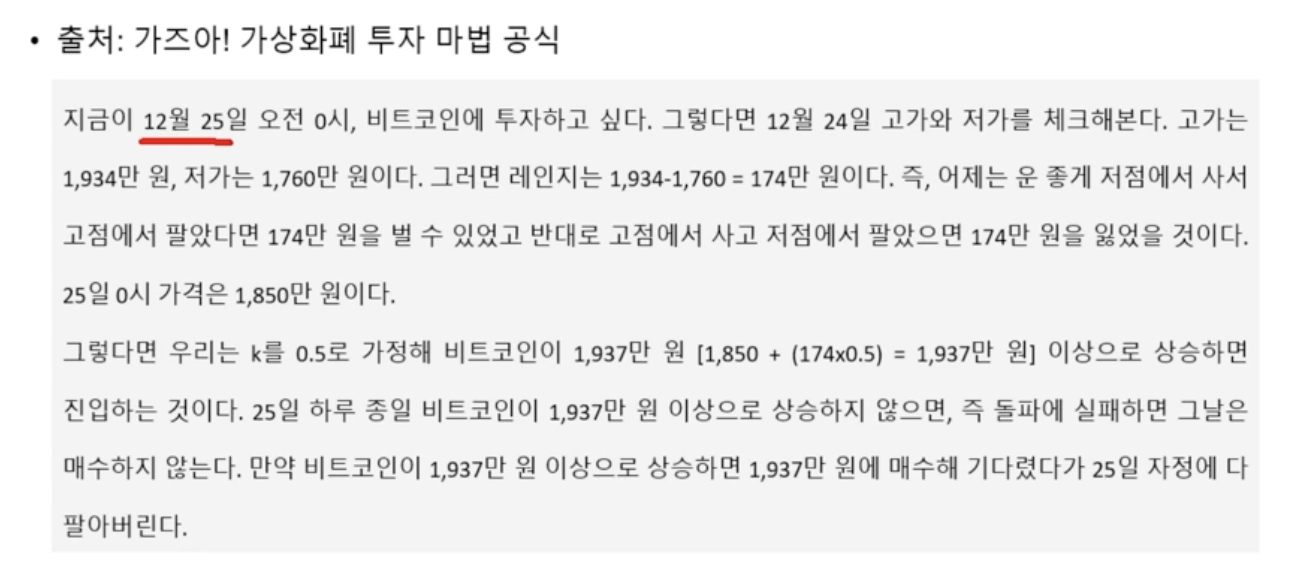
- 두 값의 차 = 변동폭 = 174만원
- 목표가 = 당일 시가 + (변동폭 * k) => 1,850 + (174*0.5) = 1937
- 12월 25일 하루동안 1937만원을 넘는지 계속 모니터링

[매수]
- 현재가가 1937만원을 넘는다면 매수 
- 현재가가 1937만원을 넘지못하면 아무것도 안함

[매도]
- 매수 된 코인은 당일 종가에 무조건 판다
    


### OHLCV
- 백테스팅 입장에서는 고가와 목표가를 비교하면 된다
- 매수 가격은 목표가로 가정
- 목표가 < 고가 = 매수할 기회가 생김
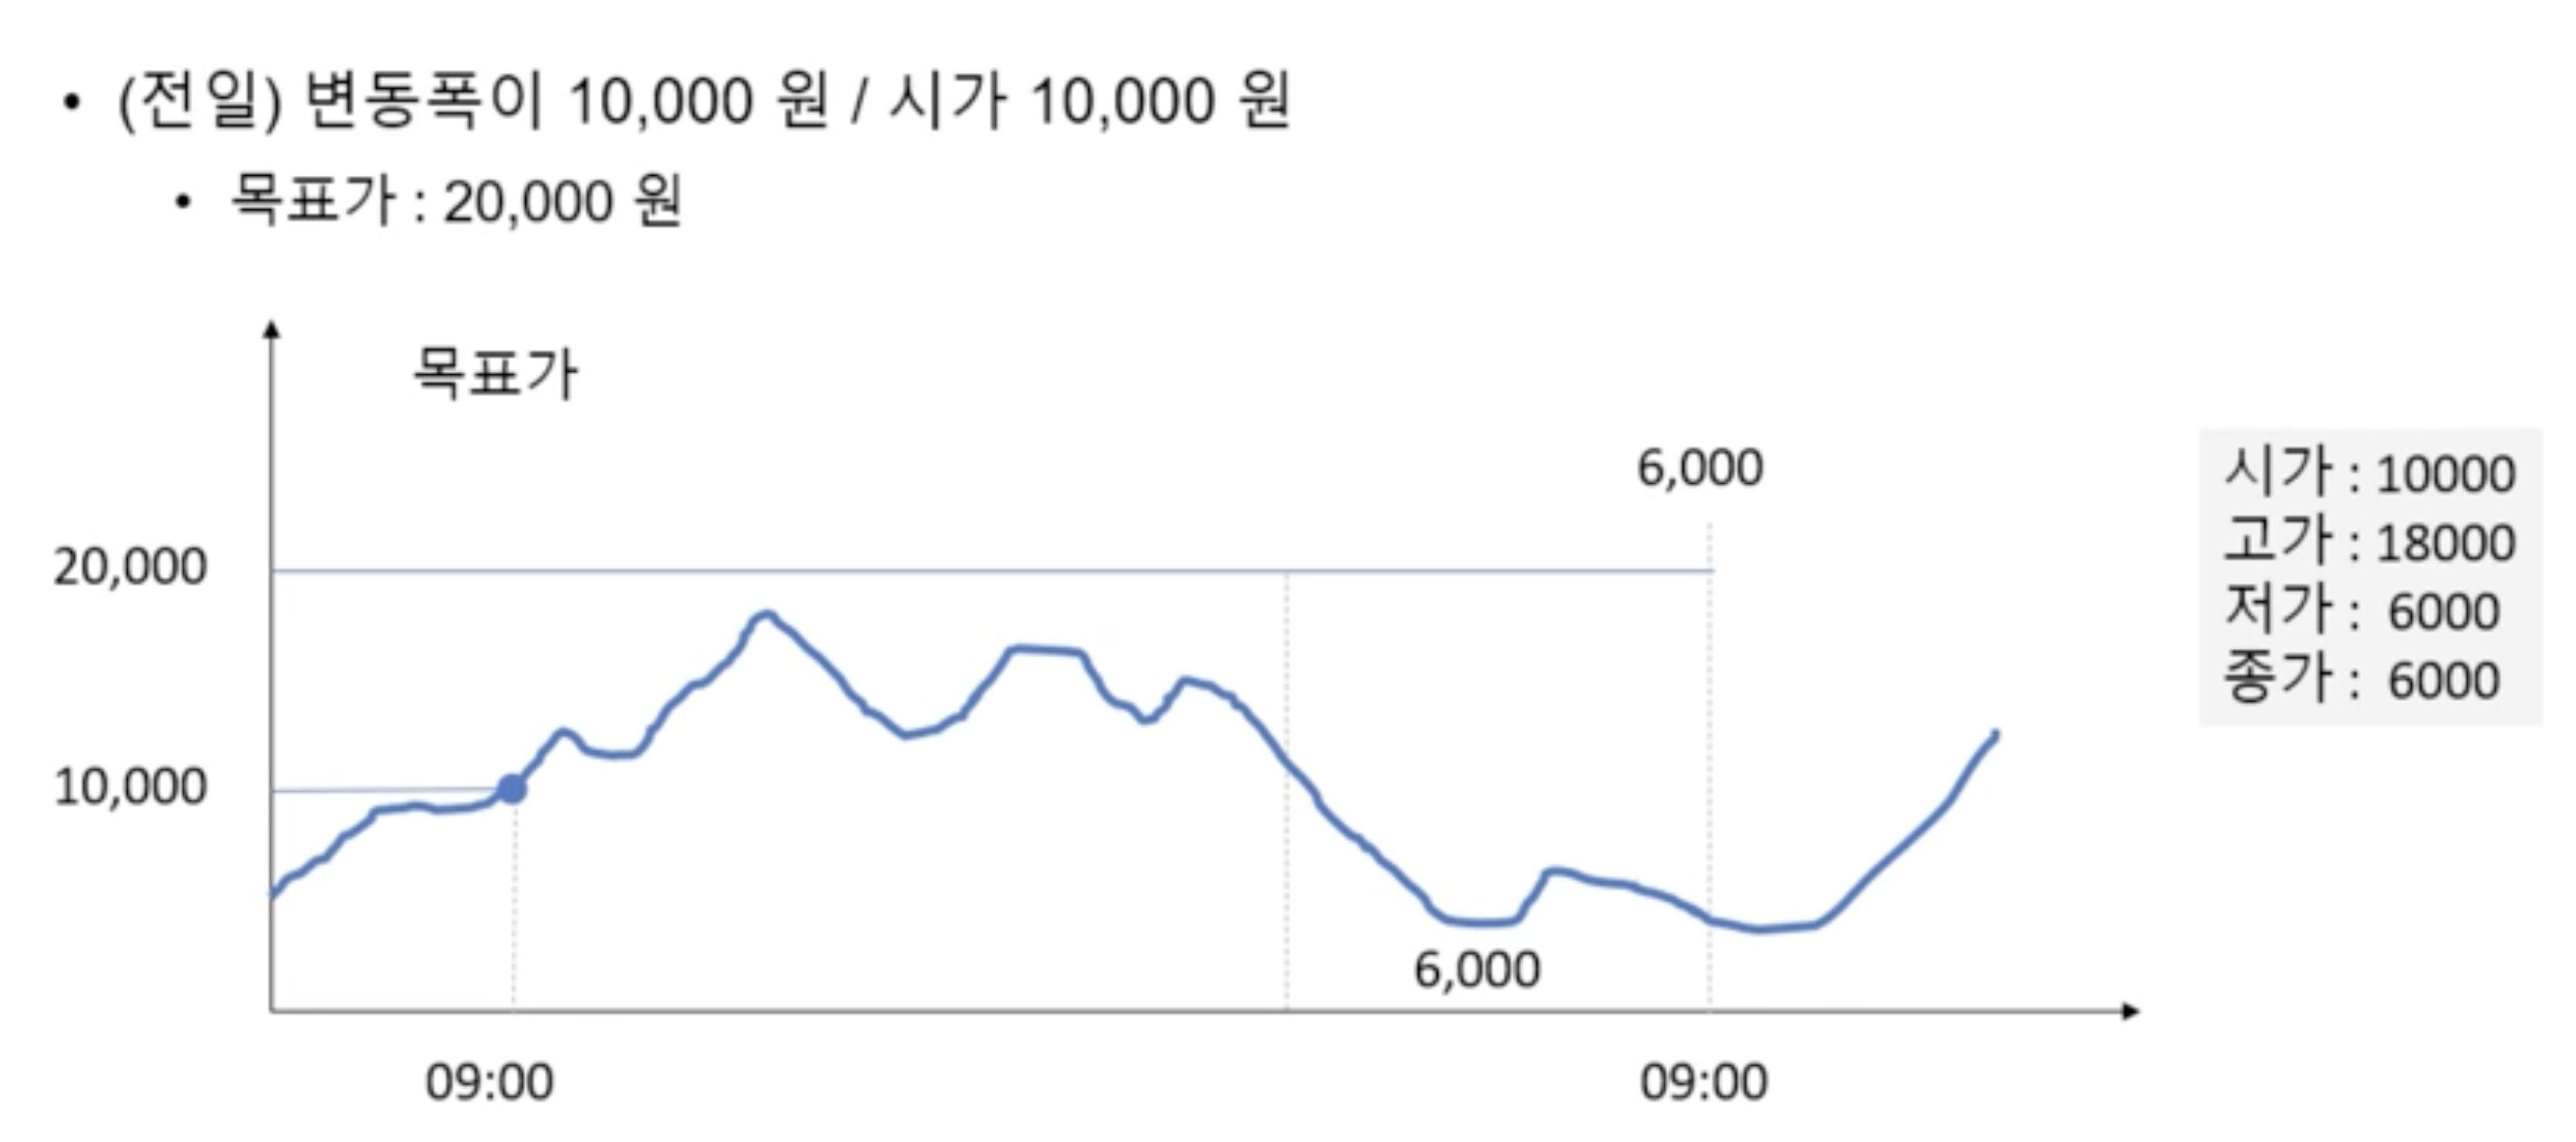
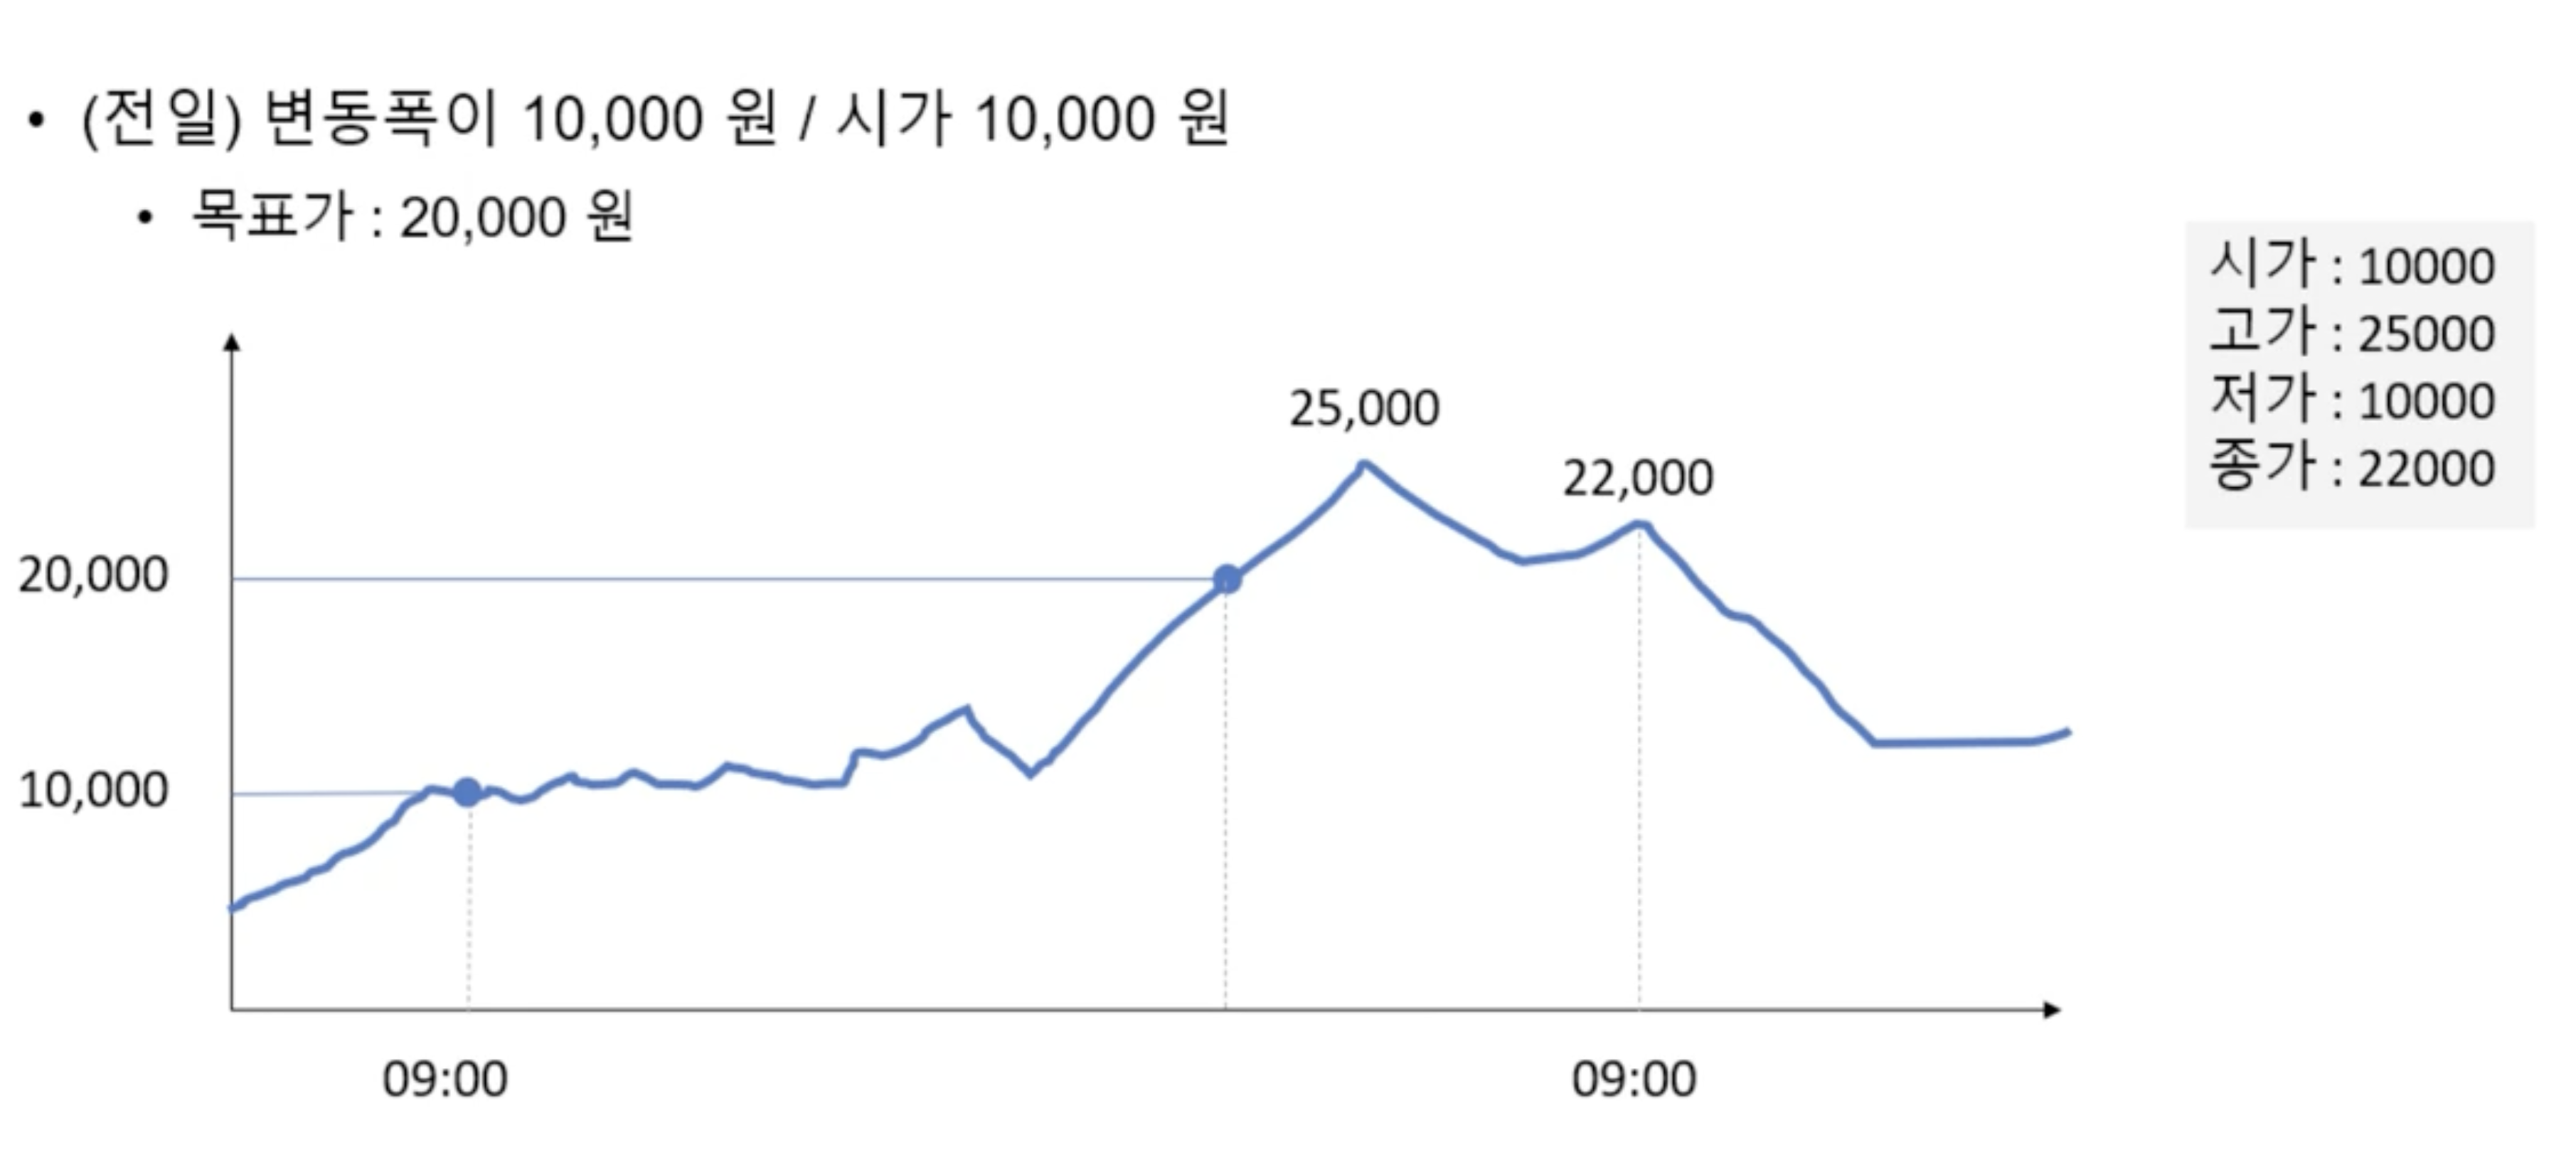

### 예시
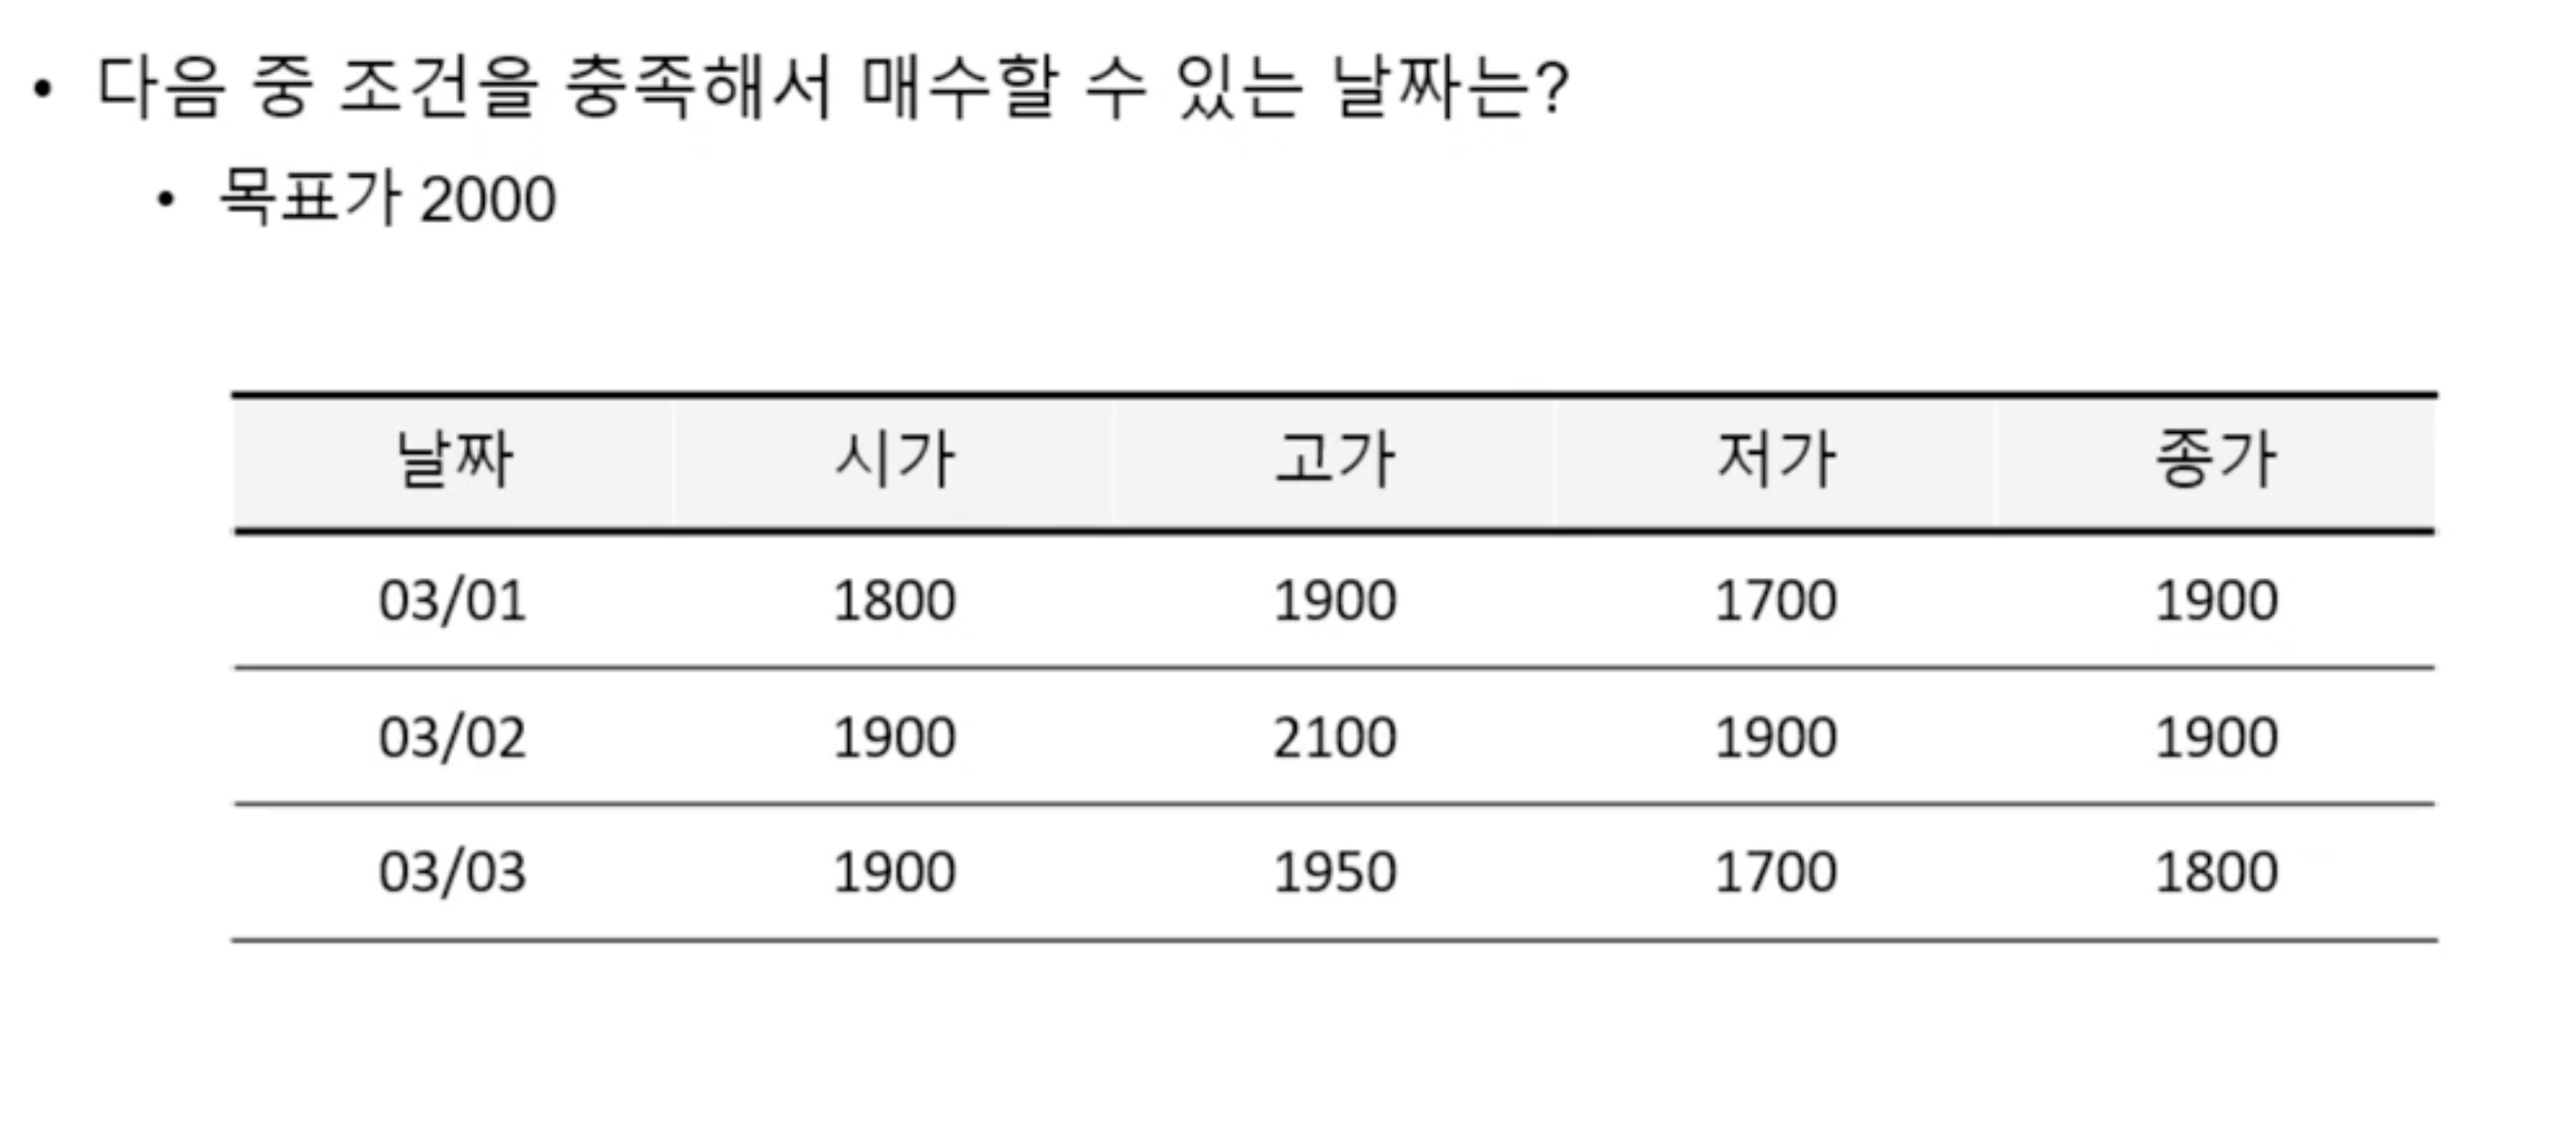
- 목표가가 고가를 넘은 것만 생각하면 됨
- 목표가 < 고가 => 매수 안됨
- 목표가 > 고가 => 매수 됨
- 목표가 > 종가 => 손실매도

### 백테스팅

In [ ]:
import pyupbit

df = pyupbit.get_ohlcv("KRW-BTC")
df.to_excel("BTC.xlsx")
print(df.tail())

                            open         high          low        close  \
2025-10-27 09:00:00  169514000.0  171500000.0  168793000.0  168980000.0   
2025-10-28 09:00:00  168980000.0  170859000.0  167550000.0  168263000.0   
2025-10-29 09:00:00  168263000.0  168401000.0  164000000.0  164617000.0   
2025-10-30 09:00:00  164597000.0  166201000.0  162000000.0  164258000.0   
2025-10-31 09:00:00  164259000.0  165940000.0  163530000.0  164644000.0   

                          volume         value  
2025-10-27 09:00:00  1539.674254  2.619041e+11  
2025-10-28 09:00:00  1268.518901  2.144541e+11  
2025-10-29 09:00:00  1947.231432  3.241872e+11  
2025-10-30 09:00:00  2160.389729  3.537565e+11  
2025-10-31 09:00:00   429.751183  7.082196e+10  


In [11]:
import pyupbit
import pandas as pd

# OHLCV 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC")

# K 값 설정
K = 0.5

# 변동폭 (고가 - 저가)
df["변동폭"] = df["high"] - df["low"]

# 변동폭 * K
df["변동폭*K"] = df["변동폭"] * K

# 목표가 (당일 시가 + 이전일 변동폭 * K)
df["목표가"] = df["open"] + df["변동폭*K"].shift(1)

# 매수가 (조건 충족 시 목표가, 아니면 0)
df["매수가"] = df.apply(lambda x: x["목표가"] if x["high"] >= x["목표가"] else 0, axis=1)

# 매도가 (매수가 있으면 종가, 아니면 0)
df["매도가"] = df.apply(lambda x: x["close"] if x["매수가"] != 0 else 0, axis=1)

# 수익률 (매수했으면 종가 / 매수가, 아니면 1)
df["수익률"] = df.apply(lambda x: x["close"] / x["매수가"] if x["매수가"] != 0 else 1, axis=1)

# 0 제거 (PRODUCT 방해 방지)
df["수익률"] = df["수익률"].replace(0, 1)

# 누적 수익률 (복리로 계산)
df["누적수익률"] = df["수익률"].cumprod()

# 최종 전체 수익률 (마지막 값)
total_return = df["누적수익률"].iloc[-1]

# Excel로 저장
df.to_excel("BTC_with_strategy.xlsx")

print(df[["open", "high", "low", "close", "목표가", "매수가", "매도가", "수익률", "누적수익률"]].tail())
print(f"\n💰 전체 누적 수익률: {total_return:.4f}배 ({(total_return - 1) * 100:.2f}%)")


                            open         high          low        close  \
2025-10-27 09:00:00  169514000.0  171500000.0  168793000.0  168980000.0   
2025-10-28 09:00:00  168980000.0  170859000.0  167550000.0  168263000.0   
2025-10-29 09:00:00  168263000.0  168401000.0  164000000.0  164617000.0   
2025-10-30 09:00:00  164597000.0  166201000.0  162000000.0  164258000.0   
2025-10-31 09:00:00  164259000.0  165940000.0  163530000.0  164433000.0   

                             목표가          매수가          매도가       수익률     누적수익률  
2025-10-27 09:00:00  171462000.0  171462000.0  168980000.0  0.985524  1.113508  
2025-10-28 09:00:00  170333500.0  170333500.0  168263000.0  0.987844  1.099972  
2025-10-29 09:00:00  169917500.0          0.0          0.0  1.000000  1.099972  
2025-10-30 09:00:00  166797500.0          0.0          0.0  1.000000  1.099972  
2025-10-31 09:00:00  166359500.0          0.0          0.0  1.000000  1.099972  

💰 전체 누적 수익률: 1.1000배 (10.00%)


## 100만원, K=0.5

In [18]:
import pyupbit
import pandas as pd

# OHLCV 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC")

# 초기 시드 설정 (예: 1,000,000원)
money = 1_000_000

# K 값 설정
K = 0.5

# 변동폭 (고가 - 저가)
df["변동폭"] = df["high"] - df["low"]

# 변동폭 * K
df["변동폭*K"] = df["변동폭"] * K

# 목표가 (당일 시가 + 이전일 변동폭 * K)
df["목표가"] = df["open"] + df["변동폭*K"].shift(1)

# 매수가 (조건 충족 시 목표가, 아니면 0)
df["매수가"] = df.apply(lambda x: x["목표가"] if x["high"] >= x["목표가"] else 0, axis=1)

# 매도가 (매수가 있으면 종가, 아니면 0)
df["매도가"] = df.apply(lambda x: x["close"] if x["매수가"] != 0 else 0, axis=1)

# 수익률 (매수했으면 종가 / 매수가, 아니면 1)
df["수익률"] = df.apply(lambda x: x["close"] / x["매수가"] if x["매수가"] != 0 else 1, axis=1)
df["수익률"] = df["수익률"].replace(0, 1)

# 누적 수익률 (복리 누적)
df["누적수익률"] = df["수익률"].cumprod()

# 💰 누적 자산 = 초기시드 × 누적수익률
df["자산(원)"] = money * df["누적수익률"]

# ✅ 최종 결과
final_money = df["자산(원)"].iloc[-1]
total_return = df["누적수익률"].iloc[-1]

# Excel로 저장
df.to_excel("BTC_with_strategy_with_seed.xlsx")

# 결과 출력
print(df[["open","high","low","close","목표가","매수가","매도가","수익률","누적수익률","자산(원)"]].tail())
print(f"\n💰 초기 자본: {money:,.0f}원")
print(f"📈 최종 자산: {final_money:,.0f}원")
print(f"📊 전체 누적 수익률: {total_return:.4f}배 ({(total_return - 1) * 100:.2f}%)")


                            open         high          low        close  \
2025-10-27 09:00:00  169514000.0  171500000.0  168793000.0  168980000.0   
2025-10-28 09:00:00  168980000.0  170859000.0  167550000.0  168263000.0   
2025-10-29 09:00:00  168263000.0  168401000.0  164000000.0  164617000.0   
2025-10-30 09:00:00  164597000.0  166201000.0  162000000.0  164258000.0   
2025-10-31 09:00:00  164259000.0  165940000.0  163530000.0  164390000.0   

                             목표가          매수가          매도가       수익률  \
2025-10-27 09:00:00  171462000.0  171462000.0  168980000.0  0.985524   
2025-10-28 09:00:00  170333500.0  170333500.0  168263000.0  0.987844   
2025-10-29 09:00:00  169917500.0          0.0          0.0  1.000000   
2025-10-30 09:00:00  166797500.0          0.0          0.0  1.000000   
2025-10-31 09:00:00  166359500.0          0.0          0.0  1.000000   

                        누적수익률         자산(원)  
2025-10-27 09:00:00  1.113508  1.113508e+06  
2025-10-28 09:00:00  1.0

## 1년, 100만원, k=0.72

In [17]:
import pyupbit
import pandas as pd
from datetime import datetime, timedelta

# -------------------------------
# 1️⃣ OHLCV 최근 1년치 데이터 가져오기
# -------------------------------
ticker = "KRW-BTC"
today = datetime.now()
dfs = []

# 약 400일치 확보 (200개씩 2회 호출)
for i in range(2):
    df_part = pyupbit.get_ohlcv(ticker, interval="day", to=today, count=200)
    dfs.append(df_part)
    today = df_part.index[0] - timedelta(days=1)

# 합치기 및 최근 1년 필터링
df = pd.concat(dfs).sort_index()
one_year_ago = datetime.now() - timedelta(days=365)
df = df[df.index >= one_year_ago]

# -------------------------------
# 2️⃣ 전략 계산
# -------------------------------
# 초기 시드 설정
money = 1_000_000  # 100만원

# K 값 설정
K = 0.72

# 변동폭 (고가 - 저가)
df["변동폭"] = df["high"] - df["low"]

# 변동폭 * K
df["변동폭*K"] = df["변동폭"] * K

# 목표가 (당일 시가 + 이전일 변동폭 * K)
df["목표가"] = df["open"] + df["변동폭*K"].shift(1)

# 매수가 (조건 충족 시 목표가, 아니면 0)
df["매수가"] = df.apply(lambda x: x["목표가"] if x["high"] >= x["목표가"] else 0, axis=1)

# 매도가 (매수가 있으면 종가, 아니면 0)
df["매도가"] = df.apply(lambda x: x["close"] if x["매수가"] != 0 else 0, axis=1)

# 수익률 (매수했으면 종가 / 매수가, 아니면 1)
df["수익률"] = df.apply(lambda x: x["close"] / x["매수가"] if x["매수가"] != 0 else 1, axis=1)
df["수익률"] = df["수익률"].replace(0, 1)

# 누적 수익률 (복리 누적)
df["누적수익률"] = df["수익률"].cumprod()

# 💰 누적 자산 = 초기시드 × 누적수익률
df["자산(원)"] = money * df["누적수익률"]

# ✅ 최종 결과
final_money = df["자산(원)"].iloc[-1]
total_return = df["누적수익률"].iloc[-1]

# -------------------------------
# 3️⃣ 결과 저장 및 출력
# -------------------------------
df.to_excel("BTC_with_strategy_1year.xlsx")

print(df[["open","high","low","close","목표가","매수가","매도가","수익률","누적수익률","자산(원)"]].tail())
print(f"\n📆 데이터 기간: {df.index[0].date()} ~ {df.index[-1].date()}")
print(f"💰 초기 자본: {money:,.0f}원")
print(f"📈 최종 자산: {final_money:,.0f}원")
print(f"📊 전체 누적 수익률: {total_return:.4f}배 ({(total_return - 1) * 100:.2f}%)")


                            open         high          low        close  \
2025-10-27 09:00:00  169514000.0  171500000.0  168793000.0  168980000.0   
2025-10-28 09:00:00  168980000.0  170859000.0  167550000.0  168263000.0   
2025-10-29 09:00:00  168263000.0  168401000.0  164000000.0  164617000.0   
2025-10-30 09:00:00  164597000.0  166201000.0  162000000.0  164258000.0   
2025-10-31 09:00:00  164259000.0  165940000.0  163530000.0  164335000.0   

                             목표가  매수가  매도가  수익률     누적수익률         자산(원)  
2025-10-27 09:00:00  172319120.0  0.0  0.0  1.0  1.304967  1.304967e+06  
2025-10-28 09:00:00  170929040.0  0.0  0.0  1.0  1.304967  1.304967e+06  
2025-10-29 09:00:00  170645480.0  0.0  0.0  1.0  1.304967  1.304967e+06  
2025-10-30 09:00:00  167765720.0  0.0  0.0  1.0  1.304967  1.304967e+06  
2025-10-31 09:00:00  167283720.0  0.0  0.0  1.0  1.304967  1.304967e+06  

📆 데이터 기간: 2024-11-01 ~ 2025-10-31
💰 초기 자본: 1,000,000원
📈 최종 자산: 1,304,967원
📊 전체 누적 수익률: 1.3050배 (30.50%)
